In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pymc3 as pm

%matplotlib inline

In [2]:
x = np.linspace(0, 1, 40)

In [15]:
y_true = 3.2*x + np.random.normal(loc=0.0, scale=0.2, size=len(x))
y_err = np.repeat(0.2, len(x))

<Container object of 3 artists>

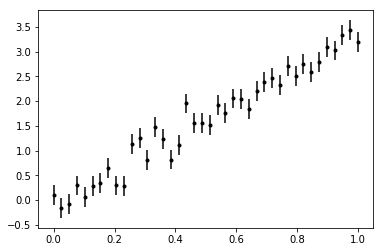

In [16]:
plt.errorbar(x, y_true, y_err, linestyle='', marker='.', color='black')

In [21]:
model = pm.Model()

In [22]:
with model:
    
    # parameter 
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    # expected value of model 
    mu = alpha*x + beta
    
    y = pm.Normal('y', mu=mu, sd=y_err, observed=y_true) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
100%|██████████| 10500/10500 [00:10<00:00, 1018.20it/s]


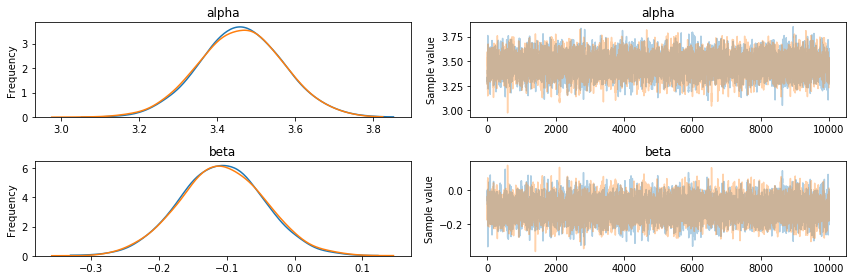

In [23]:
with model:
    trace = pm.sample(10000)
    _ = pm.traceplot(trace)